In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv("/Users/isar/PycharmProjects/films-data-science/datasets/films-imdb/IMDb movies.csv", low_memory=False)
df = df[df['metascore'].notna()] # keep rows where metascore not NaN
df['isgood'] = np.where(df['metascore'] > 50, 1, 0)
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,isgood
76,tt0006864,Intolerance,Intolerance: Love's Struggle Throughout the Ages,1916,1918-02-24,"Drama, History",163,USA,English,D.W. Griffith,...,"The story of a poor young woman, separated by ...",7.8,13875,$ 385907,NaN,NaN,99.0,111.0,77.0,1
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,In a futuristic city sharply divided between t...,8.3,156076,DEM 6000000,$ 1236166,$ 1349711,98.0,495.0,208.0,1
566,tt0018037,Il cantante di jazz,The Jazz Singer,1927,1928-02-04,"Drama, Music, Musical",88,USA,English,Alan Crosland,...,The son of a Jewish Cantor must defy the tradi...,6.5,8866,$ 422000,NaN,NaN,66.0,104.0,63.0,1
628,tt0018773,Il circo,The Circus,1928,1928-10-01,"Comedy, Romance",72,USA,English,Charles Chaplin,...,The Tramp finds work and the girl of his dream...,8.1,27414,$ 900000,NaN,$ 26916,90.0,327.0,65.0,1
714,tt0019777,The Cocoanuts,The Cocoanuts,1929,1929-08-03,"Comedy, Musical",96,USA,English,"Robert Florey, Joseph Santley",...,"During the Florida land boom,",7.0,6900,$ 500000,NaN,NaN,69.0,71.0,43.0,1


In [7]:
import re
occurences = {}

def find_occurence(x):
    if isinstance(x, str):
        occurences[re.sub('([\d.,\s])+','',x)] = None
    return None

df["budget"].apply(find_occurence)

occurences.keys()

dict_keys(['$', 'DEM', 'GBP', 'JPY', 'FRF', 'ITL', 'AUD', 'RUR', 'CAD', 'NZD', 'DKK', 'BEF', 'HKD', 'SEK', 'EUR', 'INR', 'ESP', 'ATS', 'NOK', 'THB', 'BRL', 'FIM', 'SGD', 'HUF', 'MXN', 'CNY', 'CZK', 'CHF', 'ZAR', 'KRW', 'ISK', 'PLN', 'CLP', 'NGN', 'ARS', 'ILS', 'DOP'])

In [8]:
from decimal import * # also pip install currencyconverter
from currency_converter import CurrencyConverter
c = CurrencyConverter()

def clean_currency(x):
    if isinstance(x, str):
        amount = re.sub('([A-z$.,\s])+','',x)
        cur_type = re.sub('([\d.,\s])+','',x)
        if cur_type != '$':
            try:
                return round(Decimal(c.convert(amount, cur_type, 'USD')), 2) # conversion arrondie en usd 
            except:
                return None
        else:
            return (amount)
    return(x)

df['budget'] = df['budget'].apply(clean_currency).astype('float')
df.head()


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,isgood
76,tt0006864,Intolerance,Intolerance: Love's Struggle Throughout the Ages,1916,1918-02-24,"Drama, History",163,USA,English,D.W. Griffith,...,"The story of a poor young woman, separated by ...",7.8,13875,385907.0,NaN,NaN,99.0,111.0,77.0,1
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,In a futuristic city sharply divided between t...,8.3,156076,NaN,$ 1236166,$ 1349711,98.0,495.0,208.0,1
566,tt0018037,Il cantante di jazz,The Jazz Singer,1927,1928-02-04,"Drama, Music, Musical",88,USA,English,Alan Crosland,...,The son of a Jewish Cantor must defy the tradi...,6.5,8866,422000.0,NaN,NaN,66.0,104.0,63.0,1
628,tt0018773,Il circo,The Circus,1928,1928-10-01,"Comedy, Romance",72,USA,English,Charles Chaplin,...,The Tramp finds work and the girl of his dream...,8.1,27414,900000.0,NaN,$ 26916,90.0,327.0,65.0,1
714,tt0019777,The Cocoanuts,The Cocoanuts,1929,1929-08-03,"Comedy, Musical",96,USA,English,"Robert Florey, Joseph Santley",...,"During the Florida land boom,",7.0,6900,500000.0,NaN,NaN,69.0,71.0,43.0,1


In [9]:
# %timeit -n10000 df.dtypes
df["budget"].apply(type)
df['budget_type'] = df['budget'].apply(lambda x: type(x).__name__)

In [10]:
tokeep =  ['genre', 'language', 'director']

# on trie si il reste de NaN
for tk in tokeep:
    df = df[df[tk].notna()]
    
target = df["isgood"]
inputs = df.loc[:, tokeep]
inputs

,genre,language,director
76,"Drama, History",English,D.W. Griffith
506,"Drama, Sci-Fi",German,Fritz Lang
566,"Drama, Music, Musical",English,Alan Crosland
628,"Comedy, Romance",English,Charles Chaplin
714,"Comedy, Musical",English,"Robert Florey, Joseph Santley"
...,...,...,...
85784,"Action, Crime, Drama",English,Philip Barantini
85803,Drama,"Spanish, Catalan",Lucio Castro
85827,"Biography, Comedy, Drama",English,Euros Lyn
85837,"Action, Crime, Horror",English,Joe Begos


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
inputs_dict = {}
for tk in tokeep:
    inputs_dict[tk] = LabelEncoder()

In [13]:
# transforme champ (str) en champ_n (int)
for tk in tokeep:
    inputs[tk+"_n"] = inputs_dict[tk].fit_transform(inputs[tk])
inputs.head()

,genre,language,director,genre_n,language_n,director_n
76,"Drama, History",English,D.W. Griffith,377,125,1252
506,"Drama, Sci-Fi",German,Fritz Lang,418,1163,2013
566,"Drama, Music, Musical",English,Alan Crosland,397,125,115
628,"Comedy, Romance",English,Charles Chaplin,293,125,956
714,"Comedy, Musical",English,"Robert Florey, Joseph Santley",285,125,5139


In [14]:
inputs_n = inputs.drop(tokeep,axis="columns")
inputs_n.head()

,genre_n,language_n,director_n
76,377,125,1252
506,418,1163,2013
566,397,125,115
628,293,125,956
714,285,125,5139


In [15]:
from sklearn import tree # AVANT DE FAIRE UN ARBRE FAISONS DES CORRELATIONS VISUELLES

In [16]:
model = tree.DecisionTreeClassifier()

In [17]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [18]:
#model.predict([[1462,125,294]])

In [19]:
nb_true = 0
nb_false = 0
for i in range(0, len(target)):
    inp = inputs_n.iloc[i]
    if target.iloc[i] == model.predict([inp]):
        nb_true+=1
    else:
        nb_false+=1
print(nb_true/(nb_true+nb_false))

# en fait on peut juste faire ça
model.score(inputs_n,target)

0.988326555204097


0.988326555204097

In [20]:
from sklearn.model_selection import train_test_split
input_train, input_test, target_train, target_test = train_test_split(inputs_n, target)

In [21]:
model_train = tree.DecisionTreeClassifier()
model_train.fit(input_train,target_train)


DecisionTreeClassifier()

In [22]:
model_train.score(input_train, target_train)

0.9909620405703956

In [23]:
model_train.score(input_test, target_test)

0.6072289156626506

<IPython.core.display.Javascript object>


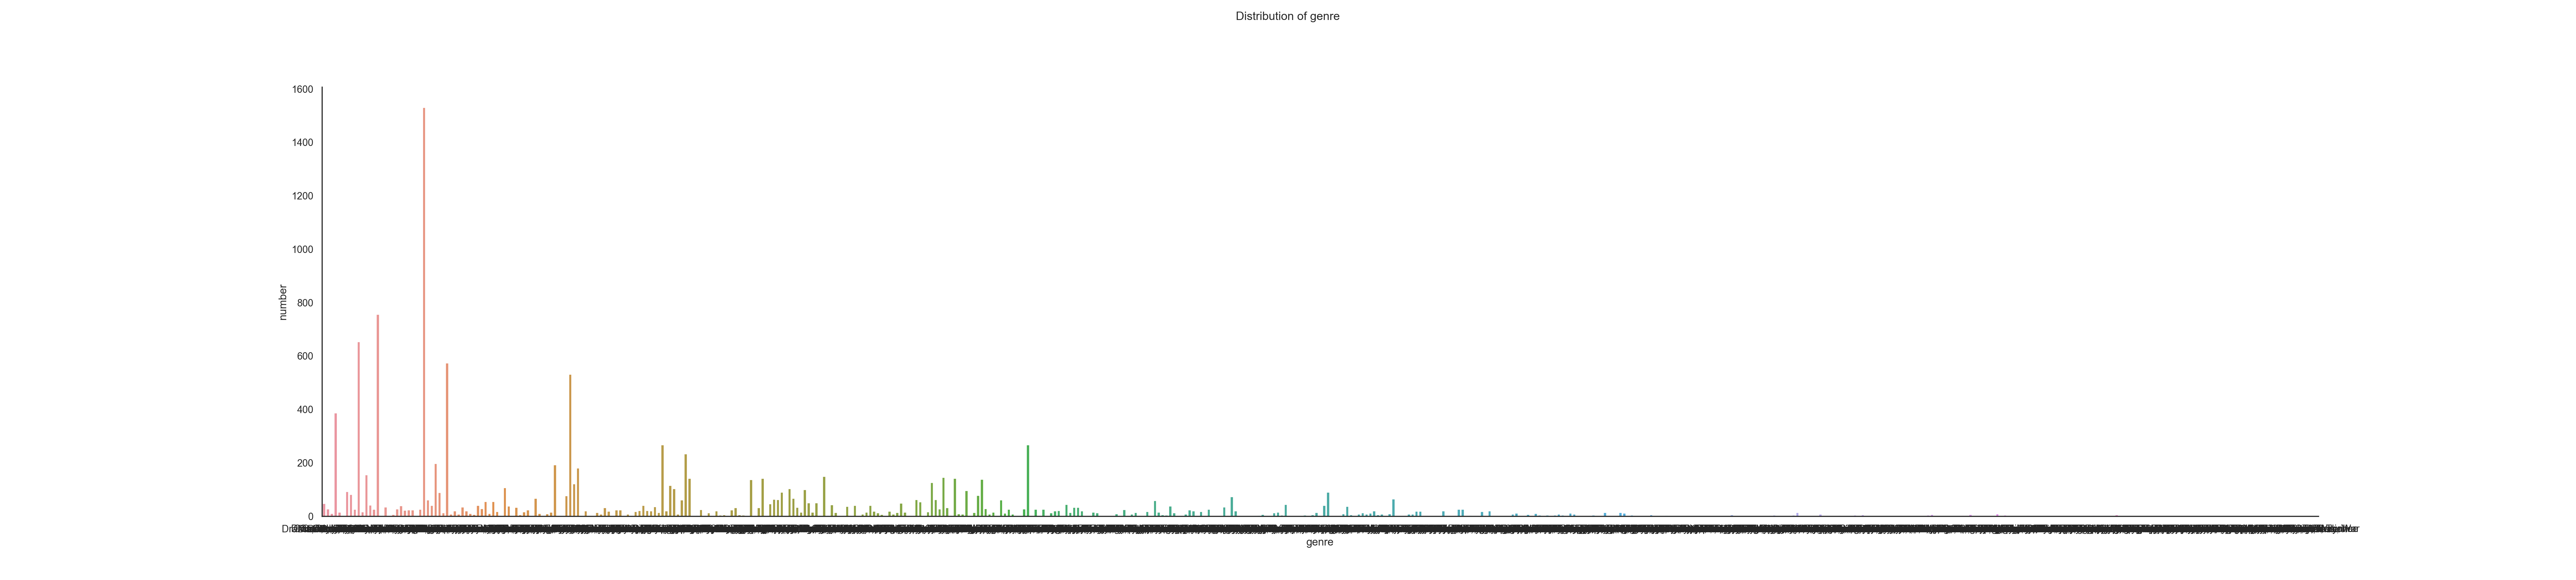

In [25]:
# for integrated graphs:
%matplotlib notebook

from modules import visumodule # pip install seaborn
import importlib
importlib.reload(visumodule)

vm = visumodule.Visualiser(df)

vm.distribution("genre")